In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import DB

In [7]:
dbase = DB()

In [41]:
data = dbase.fetch_last(3600 * 24 * 10, 'btcusdt')

In [43]:
from stonks.auxiliary.data_preprocessing import get_kline_info, get_state, plot_state, plot_target

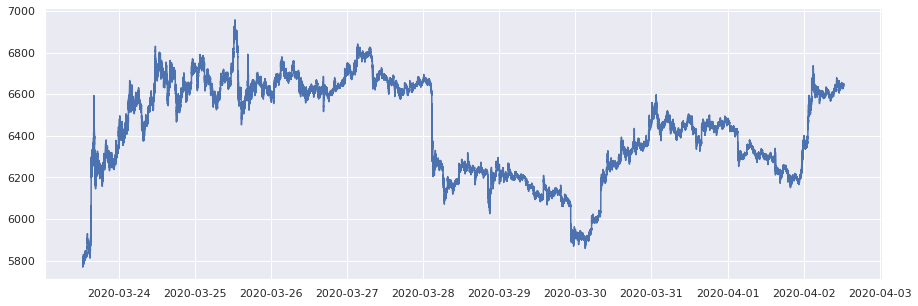

In [44]:
plot_target(data)

In [5]:
y = get_state(data, 0.003)

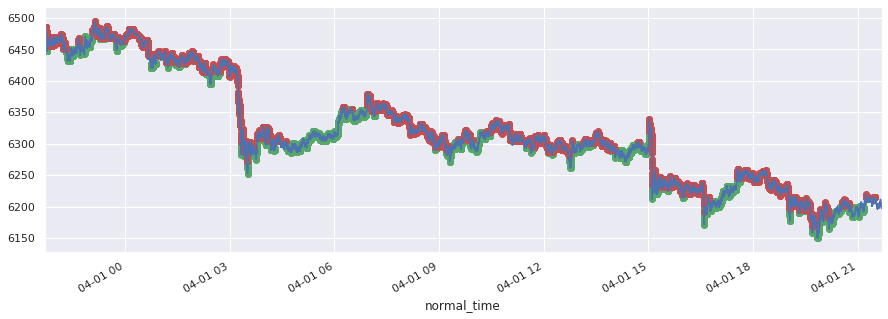

../stonks/auxiliary/data_preprocessing.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normal_time'] = data['time'].apply(datetime.datetime.fromtimestamp)


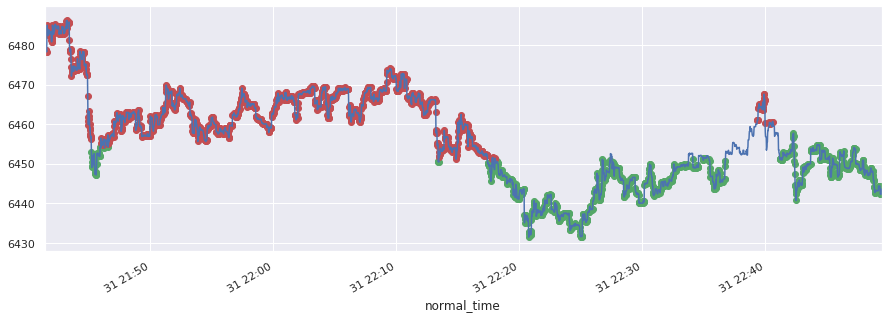

In [8]:
plt.figure(figsize=(15, 5))
plot_state(data, y)
plt.show()

plt.figure(figsize=(15, 5))
plot_state(data[:3600], y[:3600])

In [11]:
klines = get_kline_info(data)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [12]:
klines.set_index('normal_time', drop=True, inplace=True)

In [13]:
klines.drop(['time', 'id', 'currency_pair'], axis=1, inplace=True)

In [9]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from stonks.auxiliary.model_selection import fit_predict, get_importances, plot_predictions

In [25]:
from sklearn.model_selection import cross_val_score

In [17]:
from importlib import reload
reload(stonks.auxiliary.data_preprocessing)

<module 'stonks.auxiliary.data_preprocessing' from '../stonks/auxiliary/data_preprocessing.py'>

In [11]:
data.drop()

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_12,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,normal_time
0,21315937,1.585680e+09,btcusdt,363,6476.49,6476.30,6478.00,6472.91,34.180339,221342.228504,...,0.005736,0.076793,0.075504,0.027949,0.010000,0.001742,0.009487,0.015402,0.153763,2020-03-31 21:41:26.934706
1,21315948,1.585680e+09,btcusdt,363,6476.49,6476.30,6478.00,6472.91,34.180339,221342.228504,...,0.083143,0.027949,0.010000,0.001742,0.009487,0.015402,0.153763,0.001702,0.100000,2020-03-31 21:41:28.096272
2,21315959,1.585680e+09,btcusdt,363,6476.49,6476.30,6478.00,6472.91,34.180339,221342.228504,...,0.005736,0.027949,0.010000,0.001742,0.009487,0.015402,0.193047,0.153763,0.001702,2020-03-31 21:41:29.221485
3,21315970,1.585680e+09,btcusdt,363,6476.49,6476.30,6478.00,6472.91,34.180339,221342.228504,...,0.088387,0.015402,0.193047,0.153763,0.074008,0.100000,0.154380,0.003478,25.432904,2020-03-31 21:41:30.338186
4,21315981,1.585680e+09,btcusdt,363,6476.49,6476.30,6478.00,6472.91,34.180339,221342.228504,...,0.009487,0.015402,0.193047,0.153763,0.100000,0.154380,0.003478,25.432904,0.003094,2020-03-31 21:41:31.468422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75640,22147974,1.585766e+09,btcusdt,382,6206.45,6198.24,6206.84,6197.61,22.119163,137161.490925,...,1.033400,0.020000,5.111623,0.250000,0.161332,1.742859,0.065027,0.007000,0.161324,2020-04-01 21:41:21.709038
75641,22147985,1.585766e+09,btcusdt,382,6206.45,6198.24,6206.84,6197.61,22.119163,137161.490925,...,0.200000,0.242063,0.020000,0.100000,0.158000,0.161327,5.111623,0.250000,0.161332,2020-04-01 21:41:22.862913
75642,22147996,1.585766e+09,btcusdt,382,6206.45,6198.24,6206.84,6197.61,22.119163,137161.490925,...,0.200000,0.242063,0.173340,0.020000,0.100000,2.197566,0.158000,0.161327,5.111623,2020-04-01 21:41:23.974732
75643,22148007,1.585766e+09,btcusdt,382,6206.45,6198.24,6206.84,6197.61,22.119163,137161.490925,...,0.232212,0.200000,0.200000,0.242063,0.173340,0.020000,0.100000,2.197566,0.158000,2020-04-01 21:41:25.106834


In [27]:
cross_val_score( LogisticRegression(n_jobs=-1, solver='lbfgs'), klines, y)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.57258567, 0.53703011, 0.50965812])

In [20]:
y = get_state(klines, 0.003)

In [21]:
klines = klines[y != -1]
y = y[y != -1]

In [22]:
model, X_train, X_test, y_train, y_test, probas = fit(klines, y)

              precision    recall  f1-score   support

           0       0.36      0.52      0.42      5029
           1       0.66      0.50      0.57      9416

    accuracy                           0.51     14445
   macro avg       0.51      0.51      0.50     14445
weighted avg       0.56      0.51      0.52     14445



In [31]:
to_leave = [['depth_ask_price_' + str(i), 'depth_ask_quantity_' + str(i), 'depth_bid_price_' + str(i),
             'depth_bid_quantity_' + str(i)] for i in range(1, 21)]
lea = []
for el in to_leave:
    lea += el

In [32]:
klines.drop(lea, axis=1, inplace=True)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
def get_importances(model):
    imp = model.feature_importances_
    names = model.get_booster().feature_names
    li = list(zip(imp, names))
    li.sort(reverse=True)
    return li

In [19]:
get_importances(model)[:10]

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [23]:
def plot(X_test, y_test, probas):
    X_test1 = X_test[-3600:]
    probas1 = probas[-3600:]
    y_test1 = y_test[-3600:]
    
    X_test1['target'] = (X_test1['depth_bid_price_1'] + X_test1['depth_ask_price_1']) / 2.

    ups = probas1['maximum'] > 0.5
    downs = probas1['minimum'] > 0.5

    plt.figure(figsize=(15, 5))
    plt.plot(X_test1.index, X_test1['target'])
    plt.scatter(X_test1[y_test1 == 1].index, X_test1[y_test1== 1]['target'], color='g')
    plt.scatter(X_test1[y_test1 == 0].index, X_test1[y_test1 == 0]['target'], color='r')
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.plot(X_test1.index, X_test1['target'])
    plt.scatter(X_test1[ups].index, X_test1[ups]['target'], color='r')
    plt.scatter(X_test1[downs].index, X_test1[downs]['target'], color='g')

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


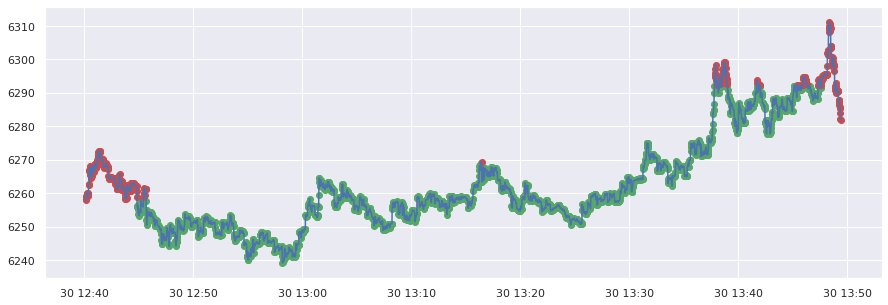

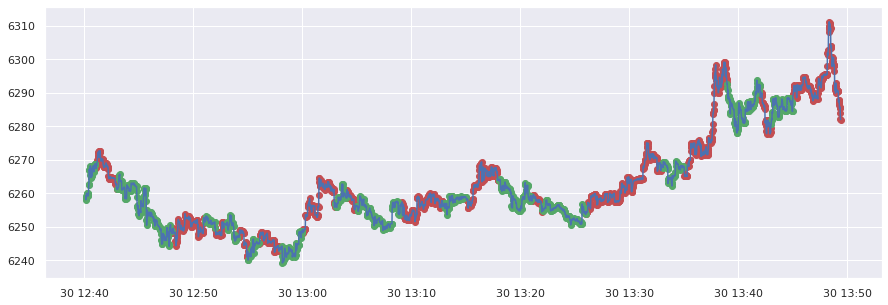

In [24]:
plot(X_test, y_test, probas)

In [29]:
data

,id,time,currency_pair,depth_bid_price_1,depth_bid_price_2,depth_bid_price_3,depth_bid_price_4,depth_bid_price_5,depth_bid_price_6,depth_bid_price_7,...,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,normal_time,kline_id
38,19393420,1.585480e+09,btcusdt,6171.02,6169.66,6169.63,6169.35,6169.26,6169.09,6168.86,...,0.243080,0.200000,0.039355,0.300000,0.543078,0.543050,6.200000,0.009000,2020-03-29 14:00:00.344851,1.0
39,19393431,1.585480e+09,btcusdt,6169.35,6169.27,6169.26,6169.11,6169.10,6169.09,6168.86,...,0.300000,0.003000,0.543050,6.200000,0.009000,0.108380,0.294000,0.093402,2020-03-29 14:00:01.538996,1.0
40,19393442,1.585480e+09,btcusdt,6172.29,6171.37,6171.33,6171.15,6171.09,6170.74,6170.71,...,0.200000,0.343570,0.323839,0.019677,0.300000,1.385907,0.300045,0.300000,2020-03-29 14:00:03.486393,1.0
41,19393453,1.585480e+09,btcusdt,6171.43,6171.15,6171.09,6169.89,6169.74,6169.71,6169.29,...,0.009000,0.411216,0.309000,0.102180,0.425698,0.162034,0.013626,0.250000,2020-03-29 14:00:05.288622,1.0
42,19393464,1.585480e+09,btcusdt,6170.00,6169.90,6169.81,6169.72,6168.86,6168.67,6168.66,...,0.162059,0.162032,0.009000,0.300000,0.309000,0.102180,0.013626,0.250000,2020-03-29 14:00:06.488622,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75385,20222245,1.585566e+09,btcusdt,6271.56,6271.45,6271.11,6270.66,6270.65,6270.64,6270.55,...,0.119402,0.400000,0.400000,0.300000,0.400000,0.159459,0.500000,0.069362,2020-03-30 13:59:10.586653,1438.0
75386,20222256,1.585566e+09,btcusdt,6270.03,6270.02,6269.40,6269.37,6269.04,6269.00,6268.97,...,0.500000,0.500043,0.500000,0.368509,0.200000,0.008991,0.159478,0.200000,2020-03-30 13:59:11.770475,1438.0
75387,20222267,1.585566e+09,btcusdt,6269.46,6269.45,6269.37,6269.00,6268.37,6268.32,6268.31,...,0.300202,0.309066,0.309000,3.000000,0.159527,0.008991,0.159478,0.239257,2020-03-30 13:59:12.899944,1438.0
75388,20222278,1.585566e+09,btcusdt,6268.54,6268.50,6268.09,6268.06,6268.00,6267.51,6267.16,...,0.500000,0.289838,0.200000,0.309021,0.309000,1.000024,0.644989,3.000000,2020-03-30 13:59:14.044932,1438.0


In [75]:
reload(stonks.auxiliary.data_preprocessing)
reload(stonks.auxiliary.model_selection)

<module 'stonks.auxiliary.model_selection' from '../stonks/auxiliary/model_selection.py'>

In [33]:
data = count_some(data, 5)

IndexError: list index out of range

In [37]:
from stonks.auxiliary.data_preprocessing import construct_order_names

In [157]:
orders = data[construct_order_names(5)]

In [158]:
some = count_some(orders, 5)

../stonks/auxiliary/data_preprocessing.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['mid_price'] = (orders['depth_bid_price_1'] + orders['depth_ask_price_1']) / 2.
../stonks/auxiliary/data_preprocessing.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['mid_distance_' + name[1] + '_' + name[3]] = orders[col] / orders['mid_price'] - 1.
../stonks/auxiliary/data_preprocessing.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [159]:
some.drop(construct_order_names(5), axis=1, inplace=True)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [160]:
some.drop('mid_price', axis=1, inplace=True)

In [47]:
from stonks.auxiliary.model_selection import fit_predict, plot_predictions

In [61]:
from stonks.auxiliary.data_preprocessing import get_state_cpp

In [84]:
y3 = get_state(data, 0.003)

In [168]:
y1 = get_state(data, 0.001)

In [169]:
model, x_train, x_test, y_train, y_test, probas = fit_predict(some, y)

              precision    recall  f1-score   support

           0       0.58      0.90      0.70      7971
           1       0.49      0.12      0.20      6008

    accuracy                           0.57     13979
   macro avg       0.53      0.51      0.45     13979
weighted avg       0.54      0.57      0.49     13979



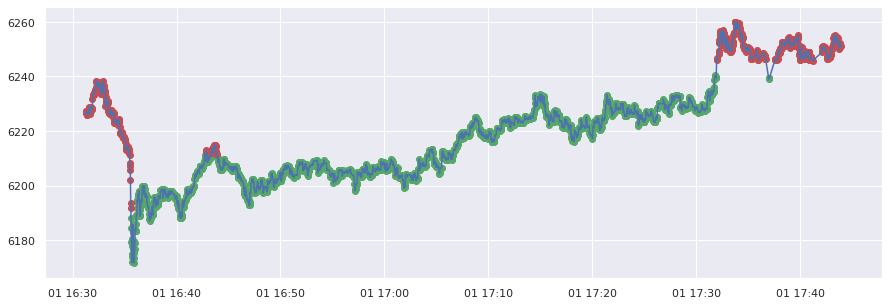

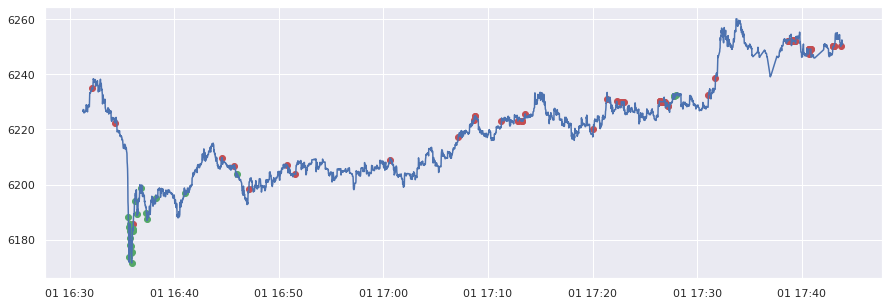

In [177]:
plot_predictions(x_test[:3600], y_test[:3600], data.loc[y_test[:3600].index]['mid_price'], probas[:3600], prob_up=0.65, prob_down=0.65)

In [16]:
from sklearn.preprocessing import StandardScaler

def rolling(data: pd.Series):
    df = pd.DataFrame()
    periods = ['5s', '15s', '30s', '1min', '5min']
    for period in periods:
        df['rolling_' + period] = data / data.rolling(period).mean()
    return df

In [125]:
rollings = rolling(data['mid_price'])

In [143]:
rollings

,rolling_5s,rolling_15s,rolling_30s,rolling_1min,rolling_5min
normal_time,,,,,
2020-03-31 21:41:26.934706,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-31 21:41:28.096272,1.000001,1.000001,1.000001,1.000001,1.000001
2020-03-31 21:41:29.221485,0.999967,0.999967,0.999967,0.999967,0.999967
2020-03-31 21:41:30.338186,1.000006,1.000006,1.000006,1.000006,1.000006
2020-03-31 21:41:31.468422,1.000015,1.000015,1.000015,1.000015,1.000015
...,...,...,...,...,...
2020-04-01 21:41:21.709038,1.000049,0.999857,0.999863,0.999661,0.999183
2020-04-01 21:41:22.862913,1.000050,0.999856,0.999880,0.999672,0.999184
2020-04-01 21:41:23.974732,0.999933,0.999788,0.999817,0.999601,0.999102


In [144]:
some = some.merge(rollings, on=some.index)

In [147]:
some.rename(columns={'key_0': 'normal_time'}, inplace=True)
some.set_index('normal_time', inplace=True)

In [161]:
some = pd.DataFrame(StandardScaler().fit_transform(some), index=some.index, columns=some.columns)

In [77]:
def plot_predictions(X_test, y_test, target, probas, prob_up=0.5, prob_down=0.5):
    """Отрисовывает предсказания модели"""

    ups = probas['goes_down'] > prob_down
    downs = probas['goes_up'] > prob_up

    plt.figure(figsize=(15, 5))
    plt.plot(X_test.index, target)
    plt.scatter(X_test[y_test == 1].index, target[y_test == 1], color='g')
    plt.scatter(X_test[y_test == 0].index, target[y_test == 0], color='r')
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.plot(X_test.index, target)
    plt.scatter(X_test[ups].index, target[ups], color='r')
    plt.scatter(X_test[downs].index, target[downs], color='g')


In [154]:
model.coef_

array([[ 4.78784321e+00, -4.78784321e+00, -1.00294349e-02,
        -1.81433588e-02, -2.35059697e-02,  1.87431769e-02,
        -4.10082458e-02,  7.73436315e-04,  1.24685887e-01,
         1.80774292e-02, -9.73242291e-03,  2.98843015e-02,
         4.29655123e-02, -8.79062375e-02, -8.17083802e-02,
         2.88029473e-02, -1.35428575e-02, -2.56028533e-02,
         2.08279534e-01,  2.71191323e-02,  8.55626017e-03,
        -4.08708252e-02,  2.98970416e-02,  2.57833293e-02,
        -3.45612835e-02, -9.60279445e+00,  9.04783963e-03,
         1.64211295e-03,  2.95782664e-02, -2.98086875e-02,
        -1.31983371e-01]])

In [156]:
x_test

,mid_distance_ask_1,mid_distance_bid_1,mid_distance_ask_2,mid_distance_bid_2,mid_distance_ask_3,mid_distance_bid_3,mid_distance_ask_4,mid_distance_bid_4,mid_distance_ask_5,mid_distance_bid_5,...,imbalance_2,imbalance_3,imbalance_4,imbalance_5,spread,rolling_5s,rolling_15s,rolling_30s,rolling_1min,rolling_5min
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-04-01 16:31:15.766694,0.324527,-0.324527,-0.300895,-3.554707,-0.123135,-2.697232,0.656663,-2.080421,0.485744,-2.106164,...,0.753818,-0.463076,-0.405542,-0.067886,0.300960,-2.669569,-1.806763,-0.662357,-0.243301,-0.049924
2020-04-01 16:31:16.936519,-0.770389,0.770389,1.062095,1.143742,0.433470,0.720323,0.994508,-1.201722,0.577055,-0.922984,...,-0.491398,-0.191959,-0.353158,-0.781607,-0.774054,-2.186552,-1.871854,-0.787799,-0.317720,-0.085443
2020-04-01 16:31:18.117297,0.088276,-0.088276,0.582589,-0.766277,0.037513,-0.321288,0.013743,0.111194,-0.335234,0.456056,...,1.254802,1.144034,0.167732,0.169721,0.069094,-0.349117,-1.333749,-0.494253,-0.095990,0.016084
2020-04-01 16:31:19.292324,0.066811,-0.066811,-0.300976,-0.781686,0.049884,-0.359405,2.181612,0.011079,1.762337,-0.089255,...,0.979626,1.054887,0.943537,1.107229,0.048016,0.314933,-1.236453,-0.521068,-0.100475,0.012041
2020-04-01 16:31:20.489327,-0.169327,0.169327,-0.405800,0.681659,-0.630256,-0.219672,-0.901325,0.200169,-0.639216,0.538354,...,1.430728,0.871031,0.735348,0.835261,-0.183850,0.245532,-1.117231,-0.551604,-0.112222,0.006242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01 21:29:54.851430,-0.339531,0.339531,-0.673875,0.834531,-0.950403,1.125935,-1.008573,1.289170,-1.245516,1.401267,...,-0.064050,-0.051427,-0.316791,-0.259918,-0.352480,-0.033344,0.162515,0.201370,0.279998,0.993727
2020-04-01 21:29:55.960876,-0.275006,0.275006,-0.808930,0.788232,-1.061926,0.553127,-1.106818,0.876786,-1.336902,1.164158,...,-0.046753,-0.280957,-0.351753,-0.396858,-0.289244,0.054175,0.164984,0.202454,0.293889,0.992660
2020-04-01 21:29:57.135619,-0.597668,0.597668,-0.973997,1.019753,-1.173451,1.024114,-1.292388,1.289181,-0.616036,1.524990,...,-0.570843,-0.852791,-1.136545,-1.190569,-0.605424,0.154881,0.181284,0.203534,0.319990,0.997267


In [1]:
import joblib

In [4]:
log = joblib.load('output.joblib')

In [5]:
log

[(1585817050.5435627,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 200.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  200.0,
  0.0,
  [('btcusdt', 0.7550579187551556, 0.24494208124484446)]),
 (1585817051.5308201,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 200.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  200.0,
  0.0,
  [('btcusdt', 0.6491359295271264, 0.3508640704728736)]),
 (1585817052.536766,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 200.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  200.0,
  0.0,
  [('btcusdt', 0.7465202654166259, 0.2534797345833741)]),
 (1585817053.5549524,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'u

# !!! #

In [45]:
from stonks.auxiliary.data_preprocessing import basic_clean, count_some
data = basic_clean(data)

In [46]:
y1 = get_state(data, 0.001)
y3 = get_state(data, 0.003)
y5 = get_state(data, 0.005)

plot_state(data, y3)

KeyboardInterrupt: 

In [48]:
y3

normal_time
2020-03-23 12:36:45.802038    1
2020-03-23 12:36:46.943040    1
2020-03-23 12:36:48.070125    1
2020-03-23 12:36:49.167385    1
2020-03-23 12:36:50.306284    1
                             ..
2020-04-02 12:36:40.492260   -1
2020-04-02 12:36:41.627532   -1
2020-04-02 12:36:42.774224   -1
2020-04-02 12:36:43.899697   -1
2020-04-02 12:36:45.055389   -1
Length: 754437, dtype: int64

In [49]:
from stonks.auxiliary.data_preprocessing import construct_order_names
orders = data[construct_order_names(5)]
some = count_some(orders, 5)
some.drop(construct_order_names(5), axis=1, inplace=True)
some.drop('mid_price', axis=1, inplace=True)
#  scaler = StandardScaler()
#  scaler.fit(some)
#  some = pd.DataFrame(scaler.transform(some), index=some.index, columns=some.columns)

../stonks/auxiliary/data_preprocessing.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['mid_price'] = (orders['depth_bid_price_1'] + orders['depth_ask_price_1']) / 2.
../stonks/auxiliary/data_preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['mid_distance_' + name[1] + '_' + name[3]] = orders[col] / orders['mid_price'] - 1.
../stonks/auxiliary/data_preprocessing.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [50]:
data['mid_price'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.

In [51]:
rols = rolling(data.loc[some.index]['mid_price'])

In [52]:
df = pd.concat([some, rols], axis=1)

In [53]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

In [30]:
from stonks.auxiliary.model_selection import fit_predict, plot_predictions

In [56]:
model, x_train, x_test, y_train, y_test, probas = fit_predict(df, y1)

              precision    recall  f1-score   support

           0       0.54      0.42      0.48     76543
           1       0.52      0.63      0.57     74251

    accuracy                           0.53    150794
   macro avg       0.53      0.53      0.52    150794
weighted avg       0.53      0.53      0.52    150794



In [57]:
pd.Series(model.predict(x_test)).value_counts()

1    90884
0    59910
dtype: int64

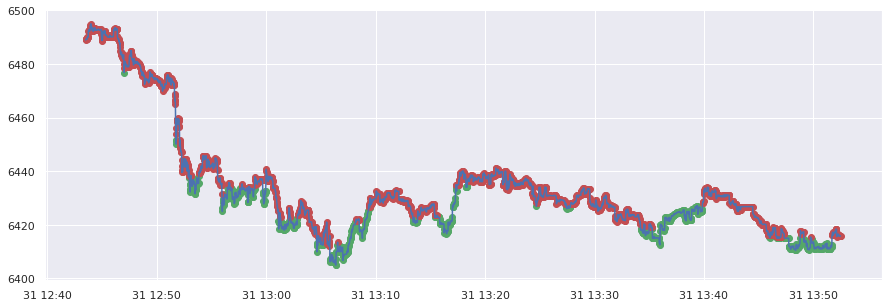

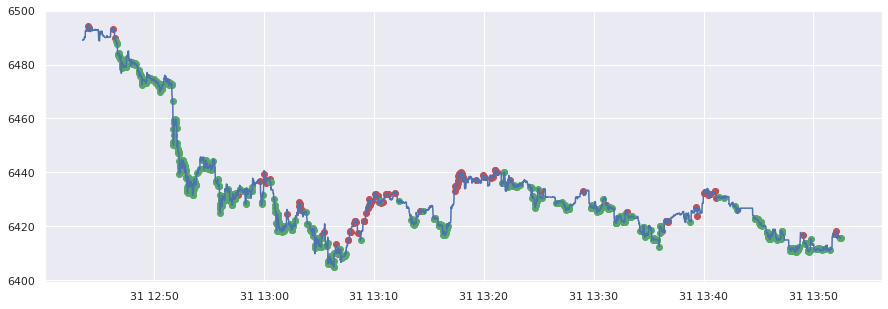

In [60]:
plot_predictions(x_test[:3600], y_test[:3600], data.loc[y_test.index]['mid_price'][:3600], probas[:3600], prob_up=0.53, prob_down=0.53)

In [38]:
logs = joblib.load('output.joblib')

In [39]:
logs

[(1585817237.3663032,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 199.91999801999995,
   'btc': 9.999999999975306e-07,
   'ltc': 0.0,
   'eth': 0.0,
   'bch': 0.0,
   'bnb': 0.0},
  200.0,
  0.0,
  [('btcusdt', 0.5877725083233545, 0.4122274916766456)]),
 (1585817238.3149917,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 199.91999801999995,
   'btc': 9.999999999975306e-07,
   'ltc': 0.0,
   'eth': 0.0,
   'bch': 0.0,
   'bnb': 0.0},
  200.0,
  0.0,
  [('btcusdt', 0.583926082104326, 0.41607391789567405)]),
 (1585817239.3197591,
  [('btcusdt', 'sell base', 0.0)],
  {'usdt': 0.0, 'btc': 0.0, 'ltc': 0.0, 'eth': 0.0, 'bch': 0.0, 'bnb': 0.0},
  {'usdt': 199.91999801999995,
   'btc': 9.999999999975306e-07,
   'ltc': 0.0,
   'eth': 0.0,
   'bch': 0.0,
   'bnb': 0.0},
  200.0,
  0.0,
  [('btcusdt', 0.5860080894992585, 0.4139919105007414)]),
 